In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import wave
import IPython.display as ipd
from PIL import Image
from matplotlib import image

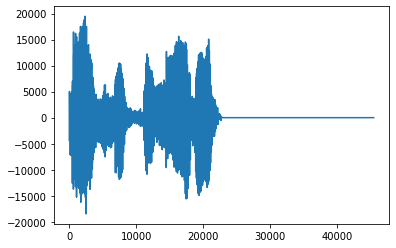

In [4]:

audio = read("MaisUmaSemana.wav")
teste = np.array(audio[1], dtype = int) 
Xt = np.zeros(teste.size)
c = 2

N = teste.size
# amplitude do k-ésimo cosseno
Ak = math.sqrt(2/N)
# c para o k = 0
C0 = math.sqrt(0.5)
# c para todos os outros k
Ck = 1
# resultado final do somatório
somatorio = 0

X = np.zeros(N, dtype = float)

for k in range(N):

    somatorio = 0
    
    for n in range(N):
        valor1 = (2*math.pi*n*k)/(2*N)
        valor2 = (k*math.pi)/(2*N)
        somatorio += teste[n]*math.cos(valor1 + valor2)
        
    if k == 0:
        X[k] = round(Ak*C0*somatorio, 5)
    else:
        X[k] = round(Ak*Ck*somatorio, 5)
        

for k in range(N):
    if((k*c) < N):
        Xt[round(k*c)] = X[k]
    else:
        Xt[k] = 0 

x = np.zeros(N, dtype = float)
teste = np.copy(Xt)

if(c > 1):
    for n in range(round(N/c)):

        somatorio = 0

        for k in range(N):
            valor1 = (2*math.pi*n*k)/(2*N)
            valor2 = (k*math.pi)/(2*N)

            if k == 0:
                somatorio += C0*teste[k]*math.cos(valor1 + valor2)
            else:
                somatorio += Ck*teste[k]*math.cos(valor1 + valor2)

        x[n] = round(Ak*somatorio, 4)
else:
    for n in range(N):

        somatorio = 0

        for k in range(N):
            valor1 = (2*math.pi*n*k)/(2*N)
            valor2 = (k*math.pi)/(2*N)

            if k == 0:
                somatorio += C0*teste[k]*math.cos(valor1 + valor2)
            else:
                somatorio += Ck*teste[k]*math.cos(valor1 + valor2)

        x[n] = round(Ak*somatorio, 4)
    
xInteiro = np.int16(x)
write('compressadoGrande.wav', 44100, xInteiro)
ipd.Audio('compressadoGrande.wav')
plt.plot(x)
plt.show()